In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf

1. 随机生成数据
x_data
y_data （为模拟真实数据加入噪音noise）

2. 定义placeholder存放数据
3. 定义神经网络结构
隐藏层：Weight biases
激活函数 tanh

输出层：Weight biases
激活函数 tanh

定义损失函数
tf.reduce_mean
定义反向传播算法
tf.train.GradientDescentOptimizer

with tf.Session() as sess:
    变量初始化
    sess.run(tf.global_variables_initializer())
    训练次数
    for i in range(2000):
    sess.run(trai_step, feed_dict(prediction, feed_dict = (x:x_data))
        
    绘图
    plt.figure()
    plt.scatter(x_data, y_data)
    plt.plot(x_data, prediction_value, 'r-', lw = 5)
    plt.show()
    

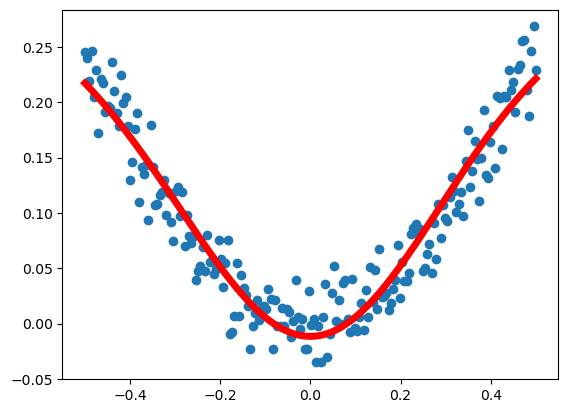

In [4]:
#设置x, y占位符
tf.compat.v1.disable_eager_execution()

x = tf.placeholder(tf.float32, [None, 1])
y = tf.placeholder(tf.float32, [None, 1])


#设置x,y值
x_data = np.linspace(-0.5, 0.5, 200)[:,np.newaxis]
noise = np.random.normal(0, 0.02, x_data.shape)
y_data = np.square(x_data) + noise
"""
x = tf.constant(x_data, dtype=tf.float32)
y = tf.constant(y_data, dtype=tf.float32)
"""


#定义网络结构：隐藏层和输出层，运用tf.Variable函数，激活函数选择tanh
Weight1 = tf.Variable(tf.random.normal([1, 10], dtype=tf.float32))  # 明确指定 dtype
Biases1 = tf.Variable(np.zeros([10], dtype=np.float32))  # 明确指定 dtype
WxPlusB1 = tf.matmul(x, Weight1) + Biases1
hidden_output = tf.tanh(WxPlusB1)

Weight2 = tf.Variable(tf.random.normal([10, 1], dtype=tf.float32))  # 明确指定 dtype
Biases2 = tf.Variable(np.zeros([1], dtype=np.float32))  # 明确指定 dtype
WxPlusB2 = tf.matmul(hidden_output, Weight2) + Biases2
final_output = tf.tanh(WxPlusB2)

#定义损失函数和反向传播

loss = tf.reduce_mean(tf.square(y - final_output))

train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

init = tf.global_variables_initializer()

with tf.compat.v1.Session() as sess:
    sess.run(init)
    for i in range(2000):
        sess.run(train_step, feed_dict={x: x_data, y: y_data})
    
    prediction_value = sess.run(final_output, feed_dict={x: x_data})
    
    plt.figure()
    plt.scatter(x_data, y_data)
    plt.plot(x_data, prediction_value, 'r-', lw=5)
    plt.show()